In [1]:
!pip install wordcloud
!pip install xlrd
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import math
!pip install textblob
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn. linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_excel("Amoxicillin.xlsx")
text_data = data['New Tweet']
text_data = text_data.fillna('')

In [3]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [4]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [5]:
X = data['New Tweet']
y = data['Results']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace missing values with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Custom tokenization pattern to split tokens by spaces and hyphens
custom_token_pattern = r"(?u)\b\w\w+\b|[-']"

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=custom_token_pattern,
    lowercase=True,  # Convert text to lowercase
    stop_words='english',  # Remove common English stop words
    max_features=10000  # Limit the number of features to a reasonable size
)

Xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
model1 = LogisticRegression()

# Train the model
model1.fit(Xtrain_tfidf, y_train)

LogisticRegression()

In [9]:
# Make predictions on the test set
y_pred = model1.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print(report)

Logistic Regression Accuracy: 0.5324675324675324
              precision    recall  f1-score   support

          -1       0.39      0.61      0.48        18
           0       0.58      0.72      0.64        25
           1       0.67      0.35      0.46        34

    accuracy                           0.53        77
   macro avg       0.55      0.56      0.53        77
weighted avg       0.57      0.53      0.52        77



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


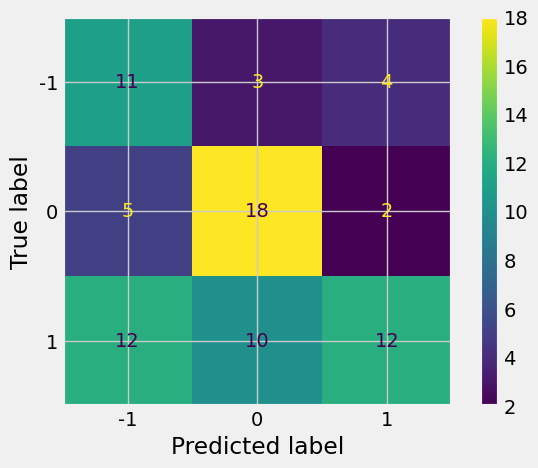

In [9]:
plot_confusion_matrix(model1, Xtest_tfidf, y_test)
plt.show()

In [10]:
model1_para = {
    'C': [0.001, 0.01, 0.1, 1, 2, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'multi_class': ['ovr', 'multinomial']
}

In [11]:
lgGSCV = GridSearchCV(model1, model1_para, scoring='accuracy', cv=10)
# Fit the GridSearchCV object to the training data
lgGSCV.fit(Xtrain_tfidf, y_train)

# Get the best hyperparameters and best model
best_params = lgGSCV.best_params_
print(best_params)
best_model = lgGSCV.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which 

{'C': 2, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: 

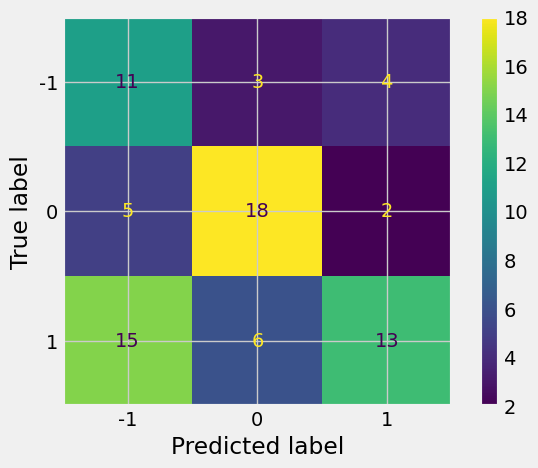

In [12]:
ConfusionMatrixDisplay.from_estimator(lgGSCV.best_estimator_, Xtest_tfidf, y_test)

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.35      0.61      0.45        18
           0       0.67      0.72      0.69        25
           1       0.68      0.38      0.49        34

    accuracy                           0.55        77
   macro avg       0.57      0.57      0.54        77
weighted avg       0.60      0.55      0.55        77



In [37]:
rf = RandomForestClassifier()

# Train the model
rf.fit(Xtrain_tfidf, y_train)

RandomForestClassifier()

In [38]:
# Make predictions on the test set
y_pred = rf.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.45454545454545453
              precision    recall  f1-score   support

          -1       0.40      0.33      0.36        18
           0       0.43      0.88      0.58        25
           1       0.64      0.21      0.31        34

    accuracy                           0.45        77
   macro avg       0.49      0.47      0.42        77
weighted avg       0.51      0.45      0.41        77



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


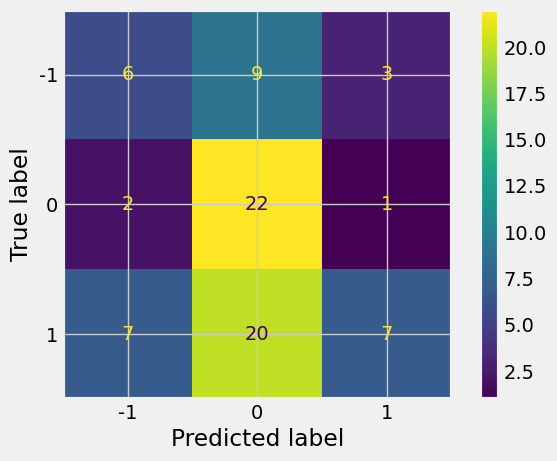

In [39]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [40]:
rf_para = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None, 0.2, 0.5, 0.8],
    'criterion': ['gini', 'entropy'],
    'random_state': [None, 42]  # Use None for no fixed seed or an integer for reproducibility
}

In [41]:
rfGSCV = GridSearchCV(rf, rf_para, cv=10, scoring='accuracy')

rfGSCV.fit(Xtrain_tfidf, y_train)

best_params = rfGSCV.best_params_
print(best_params)
best_model = rfGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': None}


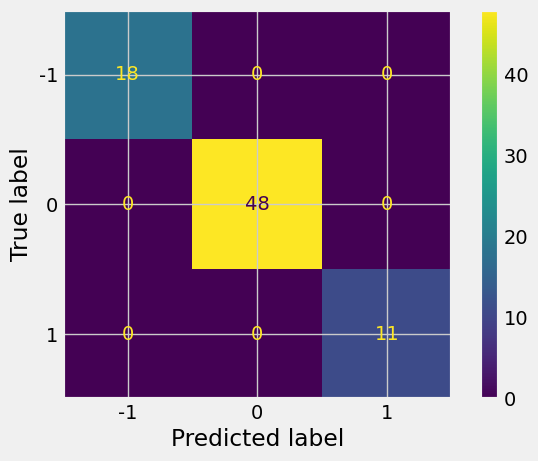

In [42]:
ConfusionMatrixDisplay.from_estimator(rfGSCV.best_estimator_, Xtest_tfidf, y_pred)

In [43]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.33      0.33      0.33        18
           0       0.46      0.88      0.60        25
           1       0.64      0.21      0.31        34

    accuracy                           0.45        77
   macro avg       0.48      0.47      0.42        77
weighted avg       0.51      0.45      0.41        77



In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(Xtrain_tfidf, y_train)

MultinomialNB()

In [17]:
# Make predictions on the test set
y_pred = nb.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5064935064935064
              precision    recall  f1-score   support

          -1       0.43      0.50      0.46        18
           0       0.49      0.84      0.62        25
           1       0.69      0.26      0.38        34

    accuracy                           0.51        77
   macro avg       0.54      0.53      0.49        77
weighted avg       0.56      0.51      0.48        77



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


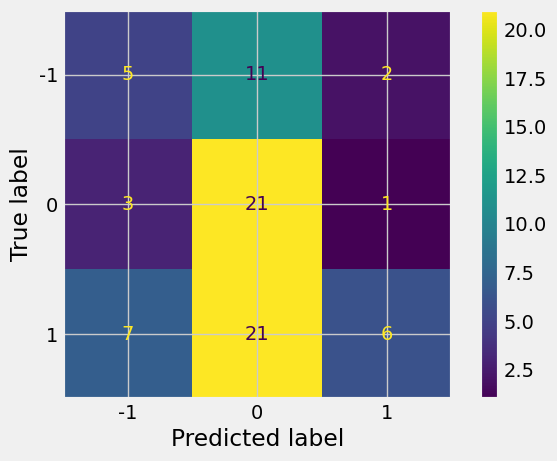

In [18]:
plot_confusion_matrix(rf, Xtest_tfidf, y_test)
plt.show()

In [19]:
 param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.2, 0.8], [0.5, 0.5]]  # Custom class priors if needed
}

In [20]:
nbGSCV = GridSearchCV(nb, param_grid, cv=10)
nbGSCV.fit(Xtrain_tfidf, y_train)

best_params = nbGSCV.best_params_
print(best_params)
best_model = nbGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  w

{'alpha': 2.0, 'class_prior': None, 'fit_prior': False}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 693, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 529, in _update_class_log_prior
    raise ValueError("Number of priors must match numbe

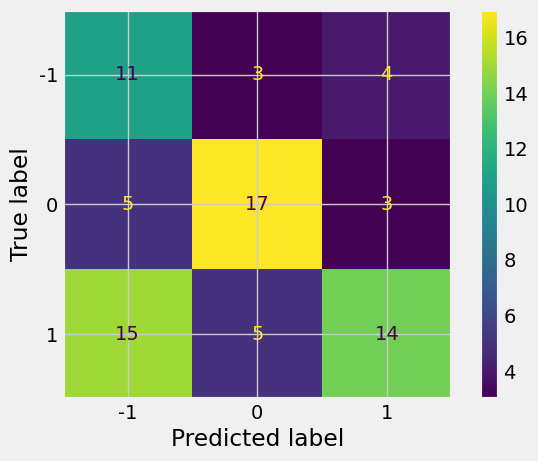

In [21]:
ConfusionMatrixDisplay.from_estimator(nbGSCV.best_estimator_, Xtest_tfidf, y_test)

In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.35      0.61      0.45        18
           0       0.68      0.68      0.68        25
           1       0.67      0.41      0.51        34

    accuracy                           0.55        77
   macro avg       0.57      0.57      0.55        77
weighted avg       0.60      0.55      0.55        77



In [23]:
# Create a base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
ad = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
ad.fit(Xtrain_tfidf, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [24]:
# Make predictions on the test set
y_pred = ad.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.4675324675324675
              precision    recall  f1-score   support

          -1       0.35      0.39      0.37        18
           0       0.45      0.76      0.57        25
           1       0.67      0.29      0.41        34

    accuracy                           0.47        77
   macro avg       0.49      0.48      0.45        77
weighted avg       0.52      0.47      0.45        77



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


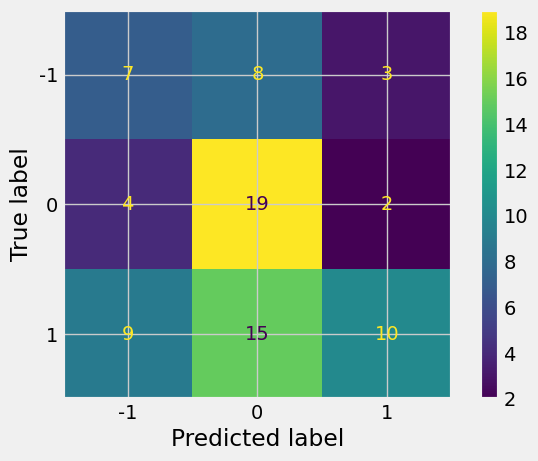

In [25]:
plot_confusion_matrix(ad, Xtest_tfidf, y_test)
plt.show()

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [27]:
adGSCV = GridSearchCV(ad, param_grid, cv=10)
adGSCV.fit(Xtrain_tfidf, y_train)

best_params = adGSCV.best_params_
print(best_params)
best_model = adGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}


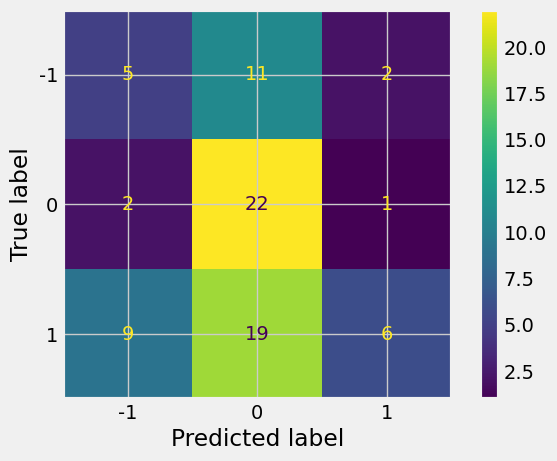

In [28]:
ConfusionMatrixDisplay.from_estimator(adGSCV.best_estimator_, Xtest_tfidf, y_test)

In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.28      0.29        18
           0       0.42      0.88      0.57        25
           1       0.67      0.18      0.28        34

    accuracy                           0.43        77
   macro avg       0.47      0.44      0.38        77
weighted avg       0.50      0.43      0.38        77



In [30]:
# Create an SVC classifier with default hyperparameters
svc = SVC()

# Fit the SVC classifier to your training data
svc.fit(Xtrain_tfidf, y_train)

SVC()

In [31]:
# Make predictions on the test set
y_pred = svc.predict(Xtest_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.44155844155844154
              precision    recall  f1-score   support

          -1       0.37      0.39      0.38        18
           0       0.44      0.88      0.59        25
           1       0.62      0.15      0.24        34

    accuracy                           0.44        77
   macro avg       0.48      0.47      0.40        77
weighted avg       0.50      0.44      0.38        77



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


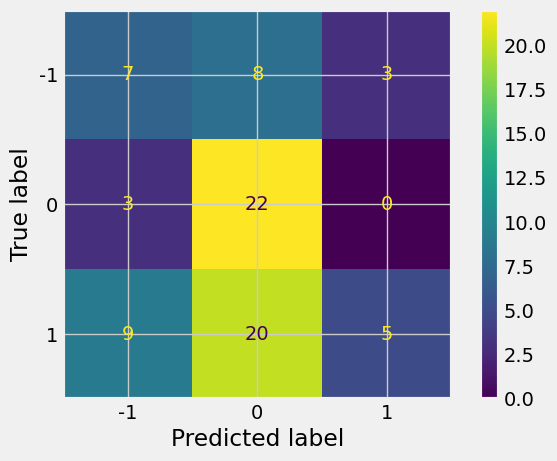

In [32]:
plot_confusion_matrix(svc, Xtest_tfidf, y_test)
plt.show()

In [33]:
param_grid= {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'class_weight': [None, 'balanced'],
    'probability': [True, False],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}

In [34]:
svcGSCV = GridSearchCV(svc, param_grid, cv=10)
svcGSCV.fit(Xtrain_tfidf, y_train)

best_params = svcGSCV.best_params_
print(best_params)
best_model = svcGSCV.best_estimator_

y_pred = best_model.predict(Xtest_tfidf)

{'C': 10.0, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid', 'probability': True, 'shrinking': True}


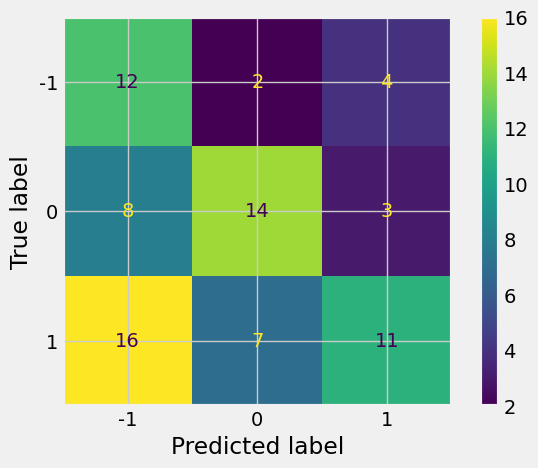

In [35]:
ConfusionMatrixDisplay.from_estimator(svcGSCV.best_estimator_, Xtest_tfidf, y_test)

In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.33      0.67      0.44        18
           0       0.61      0.56      0.58        25
           1       0.61      0.32      0.42        34

    accuracy                           0.48        77
   macro avg       0.52      0.52      0.48        77
weighted avg       0.55      0.48      0.48        77

